# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [45]:
data = pd.read_csv("ex1data1.csv")

### Visualiser les données

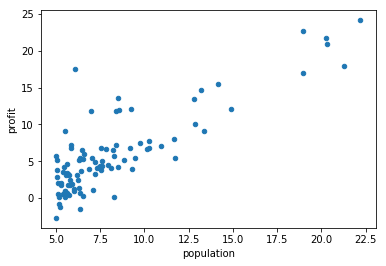

In [46]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [47]:
X = np.array(data['population'])
y = np.array(data['profit'])
print(X, y)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369] [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [115]:
theta = np.array([0.0, 0.0])

# Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [73]:
def predict(x, theta):
    return (x * theta[1] + theta[0])
def full_predict(X, theta):
    ret = []
    for elem in X:
        ret.append(predict(elem, theta))
    return (np.array(ret))

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [107]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.size
    temptheta = theta
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        a = 0
        b = 0
        for j in range(m):
            a += predict(X[j], theta) - y[j]
            b += (predict(X[j], theta) - y[j]) * X[j]
        #temptheta[0] -= alpha * (1 / m) * (full_predict(X, theta).sum() - y.sum())
        #temptheta[1] -= alpha * (1 / m) * (full_predict(X * , theta).sum() - y.sum())
        temptheta[0] -= alpha * (1 / m) * a 
        temptheta[1] -= alpha * (1 / m) * b
        theta = temptheta
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        

    return theta


### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [108]:
print(fit(X, y, theta, 0.01, 1500))

[-3.53248718  1.15653685]


## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [109]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

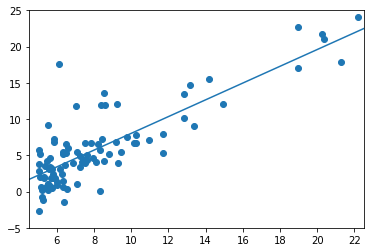

In [110]:
visualize(theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [116]:
def cost(X, y, theta):
    cost = 0
    for i in range(X.size):
        cost += (predict(X[i], theta) - y[i]) ** 2
    return (1 / (2 * X.size)) * cost


32.072733877455654


### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [117]:
print(cost(X, y, np.array([0,0])))

32.072733877455654


### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [118]:
print(cost(X, y, np.array([-1,2])))

54.24245508201238


### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [119]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.size
    temptheta = theta
    J_history = []
    for i in range(num_iters):
        a = 0
        b = 0
        for j in range(m):
            a += predict(X[j], theta) - y[j]
            b += (predict(X[j], theta) - y[j]) * X[j]
        #temptheta[0] -= alpha * (1 / m) * (full_predict(X, theta).sum() - y.sum())
        #temptheta[1] -= alpha * (1 / m) * (full_predict(X * , theta).sum() - y.sum())
        temptheta[0] -= alpha * (1 / m) * a 
        temptheta[1] -= alpha * (1 / m) * b
        theta = temptheta
        J_history.append(cost(X, y, theta))
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)

    return theta, J_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [120]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [123]:
# Lancez l'entraînement avec votre nouvelle fonctio
theta, J_history = fit_with_cost(X, y, theta, 0.01, 1500)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

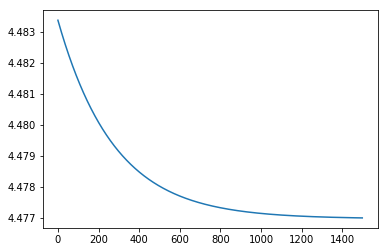

In [124]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)